In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import make_scorer

In [51]:
df_ = pd.read_csv('hackupc_provincies.csv')

In [52]:
df = df_

DF.describe()

,price,square_meters,bedrooms,bathrooms,num_images,image_data.r1f6.property,baseboard_radiator,central_ac,dishwasher,double_oven,...,id_prov_41.0,id_prov_42.0,id_prov_43.0,id_prov_44.0,id_prov_45.0,id_prov_46.0,id_prov_47.0,id_prov_48.0,id_prov_49.0,id_prov_50.0
count,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,...,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000
mean,173170.552586,118.643320,3.017359,1.713722,12.901866,3.858070,0.000417,0.004086,0.122544,0.003328,...,0.008064,0.032888,0.016250,0.018259,0.009304,0.028042,0.014083,0.011150,0.002767,0.016385
std,131901.415833,61.174251,1.014441,0.768280,12.424585,0.617113,0.020417,0.063788,0.327913,0.057590,...,0.089438,0.178344,0.126434,0.133885,0.096007,0.165092,0.117832,0.105001,0.052529,0.126950
min,15000.000000,46.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85000.000000,78.000000,2.000000,1.000000,1.000000,3.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,135000.000000,100.000000,3.000000,2.000000,11.000000,3.900000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,217000.000000,137.000000,3.114558,2.000000,20.000000,4.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,845000.000000,365.000000,19.000000,15.000000,150.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# drop columnes que no ens interessen: 
columns_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', "property_id", "summary", "region", "images", "beach_view"] 
df = df.drop(columns_to_drop, axis=1).reset_index(drop= True)
df['id_prov'] = df['id_prov'].astype('category')

label_encoder = LabelEncoder()
df['property_type_numeric'] = label_encoder.fit_transform(df['property_type'])

DF = df.drop(columns=['property_type']).reset_index(drop= True)

In [54]:
DF = DF.dropna(subset=['id_prov']).reset_index(drop= True)
DF = pd.get_dummies(DF, columns=['id_prov'])
DF = DF.drop('id_prov_51.0', axis=1)

Qp = DF['price'].quantile(0.97)
DF = DF.drop(DF[(DF['price'] > Qp)].index)

Qsm = DF['square_meters'].quantile(0.05)
DF = DF.drop(DF[(DF['square_meters'] <= Qsm)].index)
Qsm_ = DF['square_meters'].quantile(0.97)
DF = DF.drop(DF[(DF['square_meters'] > Qsm_)].index)

In [41]:
DF.describe()

,price,square_meters,bedrooms,bathrooms,num_images,image_data.r1f6.property,baseboard_radiator,central_ac,dishwasher,double_oven,...,id_prov_41.0,id_prov_42.0,id_prov_43.0,id_prov_44.0,id_prov_45.0,id_prov_46.0,id_prov_47.0,id_prov_48.0,id_prov_49.0,id_prov_50.0
count,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,...,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000,354902.000000
mean,173170.552586,118.643320,3.017359,1.713722,12.901866,3.858070,0.000417,0.004086,0.122544,0.003328,...,0.008064,0.032888,0.016250,0.018259,0.009304,0.028042,0.014083,0.011150,0.002767,0.016385
std,131901.415833,61.174251,1.014441,0.768280,12.424585,0.617113,0.020417,0.063788,0.327913,0.057590,...,0.089438,0.178344,0.126434,0.133885,0.096007,0.165092,0.117832,0.105001,0.052529,0.126950
min,15000.000000,46.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85000.000000,78.000000,2.000000,1.000000,1.000000,3.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,135000.000000,100.000000,3.000000,2.000000,11.000000,3.900000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,217000.000000,137.000000,3.114558,2.000000,20.000000,4.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,845000.000000,365.000000,19.000000,15.000000,150.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
def rmspe(y_true, y_pred):
    # Calcular el error porcentual
    percentage_error = (y_true - y_pred) / y_true
    # Ignorar divisiones por cero y elementos infinitos
    percentage_error = np.where(np.isfinite(percentage_error), percentage_error, 0)
    # Calcular el RMSPE
    rmspe = np.sqrt(np.mean(percentage_error**2))
    return rmspe


In [74]:
rmspe(y1_test, y_pred)*100

2.8739893623757182

In [73]:
y_pred

array([11.52877323, 11.79710022, 11.96049444, ..., 11.55532293,
       10.883609  , 11.22417806])

In [72]:
y1_test

369567    12.095141
139274    11.767568
168388    11.904968
202030    10.305614
240040    11.827736
            ...    
326280    11.351582
379223    11.883116
40984     11.695247
101814    10.915088
301479    11.156251
Name: logprice, Length: 99603, dtype: float64

## ara emb dataframe gran

In [47]:
encoded_df = pd.read_csv("encoded_df.csv")

In [55]:
encoded_df = pd.get_dummies(DF, columns=['id_prov'])

KeyError: "None of [Index(['id_prov'], dtype='object')] are in the [columns]"

In [14]:
encoded_df = encoded_df.drop('id_prov_51.0', axis = 1)

In [15]:
encoded_df.dtypes
encoded_df = encoded_df.drop("price", axis=1)

In [13]:
encoded_df.write_csv("encoded_df.csv")

AttributeError: 'DataFrame' object has no attribute 'write_csv'

In [72]:
DF = DF.drop('logprice', axis = 1)
X = DF.drop('price', axis=1)
y = DF['price']

In [84]:
X.to_csv("final_")

square_meters               float64
bedrooms                    float64
bathrooms                   float64
num_images                    int64
image_data.r1f6.property    float64
                             ...   
id_prov_46.0                  uint8
id_prov_47.0                  uint8
id_prov_48.0                  uint8
id_prov_49.0                  uint8
id_prov_50.0                  uint8
Length: 171, dtype: object

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
model = RandomForestRegressor(n_estimators=400, max_depth=20, min_samples_split=2, min_samples_leaf=5, max_features='auto')
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=400)

In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [134]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [92]:
y_pred = model.predict(X_test)

In [93]:
mse = mean_squared_error(y_test, y_pred)


In [94]:
np.sqrt(mse)

68647.63263634642

In [95]:
rmspe(y_test, y_pred)*100

56.46604902249614

In [82]:
import math
math.sqrt(np.square(np.subtract(np.exp(y_test), np.exp(y_pred))).mean())

C:\Users\34665\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\34665\AppData\Local\Temp\ipykernel_19784\1058966546.py:2: RuntimeWarning: overflow encountered in exp
  math.sqrt(np.square(np.subtract(np.exp(y_test), np.exp(y_pred))).mean())


nan

In [135]:
pip install shap

     |████████████████████████████████| 436 kB 3.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
kf = KFold(n_splits=5, shuffle = True)
# Inicializar la lista para almacenar los errores
errors = []

# Realizar la validación cruzada con K-Fold
for train_index, test_index in kf.split(X_train):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular el error (MSE) en el conjunto de prueba
    error = mean_squared_error(y_test, y_pred)
    
    # Almacenar el error en la lista
    errors.append(error)

# Calcular el promedio de los errores
average_error = np.mean(errors)

print("Average Error:", average_error)

In [120]:
ridge_cross_val_metrics = pd.DataFrame(columns=['mean MSE', 'mean norm_MSE', 'mean R2'])
lambdas = [0, 0.01, 0.1, 0.5, 1]

# We calculate the cross-validation metrics for each lambda 
for lambda_val in lambdas:
    kf = KFold(n_splits=5)
    i=1
    cv_mse = []
    
    cv_nmse = []
    cv_r2 = []
    j = 1
    # We compute the metrics for each fold and then perform the mean.
    for train_index, test_index in kf.split(X_train):
        x_train_fold = X_train.values[train_index]
        y_train_fold = y_train.values[train_index]
        x_test_fold = X_train.values[test_index,:]
        y_test_fold = y_train.values[test_index]

        lr = Ridge(alpha=lambda_val)
        lr.fit(x_train_fold,y_train_fold)
        y_pred_fold = lr.predict(x_test_fold)
        fold_mse =mean_squared_error(y_test_fold, y_pred_fold)
        fold_nmse =  1-r2_score(y_test_fold, y_pred_fold)
        fold_r2 = r2_score(y_test_fold, y_pred_fold)
        print(y_test_fold.shape)
        cv_mse.append(fold_mse)
        cv_nmse.append(fold_nmse)
        cv_r2.append(fold_r2)

    
    ridge_cross_val_metrics.loc['Lambda={}'.format(lambda_val),:] = [np.mean(cv_mse),np.mean(cv_nmse),np.mean(cv_r2)]
    
ridge_cross_val_metrics.sort_values(by='mean R2',ascending=False)

(59762,)
(59762,)
(59761,)
(59761,)
(59761,)
(59762,)
(59762,)
(59761,)
(59761,)
(59761,)
(59762,)
(59762,)
(59761,)
(59761,)
(59761,)
(59762,)
(59762,)
(59761,)
(59761,)
(59761,)
(59762,)
(59762,)
(59761,)
(59761,)
(59761,)


,mean MSE,mean norm_MSE,mean R2
Lambda=0,0.31667,0.485157,0.514843
Lambda=0.01,0.31667,0.485157,0.514843
Lambda=0.1,0.31667,0.485157,0.514843
Lambda=0.5,0.31667,0.485157,0.514843
Lambda=1,0.31667,0.485157,0.514843


In [ ]:
y_pred = 

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

def find_top_five_house(new_house, df):
    """Returns top 5 most similar houses in dataframe"""
    # primer fem amb les propietats importants
    df_houses = df[new_house.price < df.price*1.17]
    
    similarity_scores_200 = cosine_similarity(new_house, df_houses[[...]]) # afegir noms columnes
    most_similar_indexes_200 = similarity_scores_200.argsort()[0,::-1][:200]
    top_similar_houses_200 = data.loc[most_similar_indexes]
    
    similarity_scores_5 = cosine_similarity(new_house, top_similar_houses_200)
    most_similar_indexes_5 = similarity_scores_5.argsort()[0,::-1][:5]
    top_similar_houses_5 = data.loc[most_similar_indexes_5]

    return top_similar_houses_5

In [121]:
import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(scaler.fit_transform(X_train)))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logprice   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                 5.334e+04
Date:                Sat, 13 May 2023   Prob (F-statistic):               0.00
Time:                        17:44:45   Log-Likelihood:            -2.5149e+05
No. Observations:              298807   AIC:                         5.030e+05
Df Residuals:                  298800   BIC:                         5.031e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9045      0.001   1.16e+04      0.000      11.903      11.907
x1            -0.0383      0.001    -37.167      0.000      -0.040      -0.036
x2             0.0183      0.001     17.800      0.000       0.016       0.020
x3             0.1284      0.001     99.683      0.000       0.126       0.131
x4             0.2754      0.001    201.364      0.000       0.273       0.278
x5             0.1175      0.001    108.690      0.000       0.115       0.120
x6            -0.3299      0.001   -303.617      0.000      -0.332      -0.328
==============================================================================
Omnibus:                     7877.641   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16376.124
Skew:                           0.163   Prob(JB):                         0.00
Kurtosis:                       4.100   Cond. No.                         2.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
z = pd.DataFrame(scaler.fit_transform(X_train))
z.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,-0.093375,-0.077699,0.185040,-0.658814,0.575703,-0.022768,-0.062898,-0.378513,-0.068736,-0.511146,...,-0.098642,-0.182166,-0.11903,-0.073749,-0.26186,-0.085096,-0.035757,-0.221449,-0.292606,-0.636247
1,-0.031489,0.751567,0.185040,-0.962501,-0.520098,-0.022768,-0.062898,-0.378513,-0.068736,-0.511146,...,-0.098642,-0.182166,-0.11903,-0.073749,-0.26186,-0.085096,-0.035757,-0.221449,-0.292606,-0.636247
2,-0.040421,-0.077699,-0.837288,-0.051439,-0.520098,-0.022768,-0.062898,-0.378513,-0.068736,-0.511146,...,-0.098642,-0.182166,-0.11903,-0.073749,-0.26186,-0.085096,-0.035757,-0.221449,-0.292606,-0.636247
3,-0.094013,-0.906966,-0.837288,-0.431048,0.262617,-0.022768,-0.062898,2.641920,-0.068736,-0.511146,...,-0.098642,-0.182166,-0.11903,-0.073749,-0.26186,-0.085096,-0.035757,-0.221449,-0.292606,-0.636247
4,-0.094013,-0.906966,0.185040,-0.431048,0.106074,-0.022768,-0.062898,-0.378513,-0.068736,-0.511146,...,-0.098642,-0.182166,-0.11903,-0.073749,-0.26186,-0.085096,-0.035757,-0.221449,-0.292606,-0.636247


ValueError: x and y must be the same size

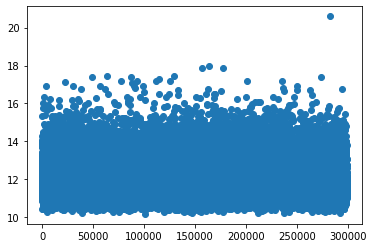

In [128]:
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
y_pred_test = lr.predict(X_test)



In [135]:
y2 = np.exp(y_test)
yout = np.exp(y_pred_test)
sum = 0
for i in range (len(y2)):
    sum = sum + (y2[i]-yout[i])**2
    
mse = 1/len(y2) * sum

KeyError: 0

In [139]:
y2)**2

369567    3.204100e+10
139274    1.664100e+10
168388    2.190400e+10
202030    8.940100e+08
240040    1.876900e+10
              ...     
326280    7.242010e+09
379223    2.096733e+10
40984     1.440000e+10
101814    3.025000e+09
301479    4.900000e+09
Name: logprice, Length: 99603, dtype: float64

In [138]:
yout

array([139905.72998193, 124588.37159946, 206969.08587581, ...,
       102891.84076001, 135438.62445938, 100916.37563583])